In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [2]:
print(tf.__version__)

2.16.1


In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
training_set=train_datagen.flow_from_directory('C:\\Users\\Lenovo\\Desktop\\CNNprojeleri\\HARDfakevsreal',
                                                   target_size=(64,64),
                                                   batch_size=32,
                                                   class_mode='binary')

Found 1289 images belonging to 2 classes.


In [4]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory('C:\\Users\\Lenovo\\Desktop\\CNNprojeleri\\HARDfakevsreal',
                                                   target_size=(64,64),
                                                   batch_size=32,
                                                   class_mode='binary')

Found 1289 images belonging to 2 classes.


In [5]:
cnn=tf.keras.models.Sequential()

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))

C:\Users\Lenovo\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [11]:
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [12]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
#cnn.fit(x=training_set,validation_data=test_set,epochs=5)

Epoch 1/10


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.7422 - loss: 0.5164 - val_accuracy: 0.9899 - val_loss: 0.0422
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.9816 - loss: 0.0623 - val_accuracy: 0.9977 - val_loss: 0.0078
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.9958 - loss: 0.0106 - val_accuracy: 0.9992 - val_loss: 0.0067
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.9983 - loss: 0.0100 - val_accuracy: 0.9984 - val_loss: 0.0031
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.9984 - loss: 0.0071 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.9988 - loss: 0.0058 - val_accuracy: 1.0000 - val_loss: 9.5054e-04
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.9980 - loss: 0.0057 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.9982 - loss: 0.0066 - val_accuracy: 0.9977 - 

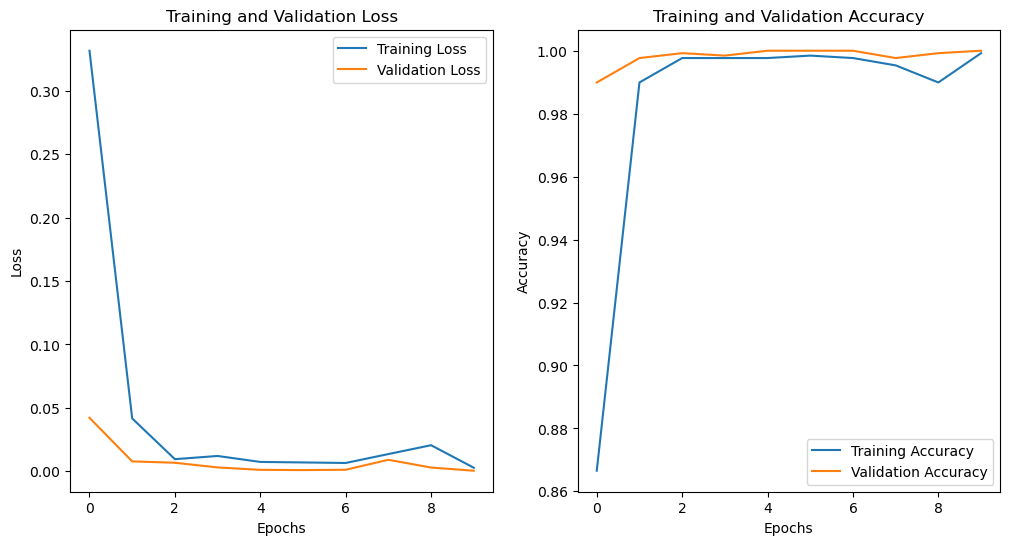

In [14]:
history = cnn.fit(x=training_set, validation_data=test_set, epochs=10)


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
